In [1]:
from __future__ import division
import os
import numpy as np 
import pandas as pd
from helpers import data_provider
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# figure adjustments for compatibility with latex
%matplotlib inline
plt.style.use('classic')
plt.rc("figure", facecolor="white")


fig_width_pt = 469.755  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]
params = {'backend': 'ps',
          'axes.labelsize': 10,
          'text.fontsize': 10,
          'legend.fontsize': 10,
          'xtick.labelsize': 8,
          'ytick.labelsize': 8,
          'text.usetex': True,
          'figure.figsize': fig_size}
plt.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
plt.rcParams.update(params)

C:\Users\chris\Anaconda3\envs\mlp\lib\site-packages\matplotlib\__init__.py:913: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Linear Regression Results

In [3]:
# load the results csv
data = pd.read_csv('results_linear_regression.csv',index_col='House')
data = data.drop(['Unnamed: 0'],axis=1)

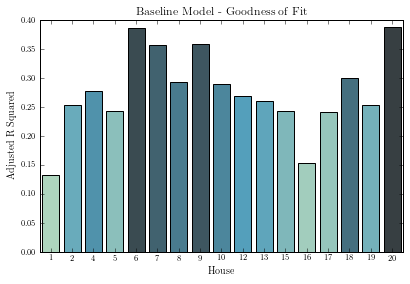

In [4]:
#sns.set(style="whitegrid", color_codes=True)
y=data.train_r_squared_adj.values
x=data.index
pal = sns.color_palette("GnBu_d", len(data))
rank = data.train_r_squared_adj.argsort().argsort()

plt.figure(1)
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank])
plt.ylabel('Adjusted R Squared')
plt.title('Baseline Model - Goodness of Fit')
plt.savefig('figures/baseline_model/adj_rsquared.eps')
plt.savefig('figures/baseline_model/adj_rsquared.pdf')
plt.show()

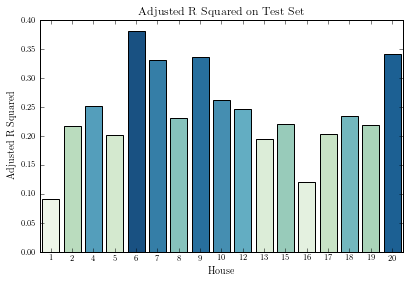

In [8]:
#sns.set(style="whitegrid", color_codes=True)
y=data.test_r_squared_adj.values
x=data.index
pal = sns.color_palette("GnBu_r", len(data))
rank = data.test_r_squared_adj.argsort().argsort()

plt.figure(1)
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank])
plt.ylabel('Adjusted R Squared')
plt.title('Adjusted R Squared on Test Set')
plt.savefig('figures/baseline_model/adj_rsquared_test.eps')
plt.savefig('figures/baseline_model/adj_rsquared_test.pdf')
plt.show()

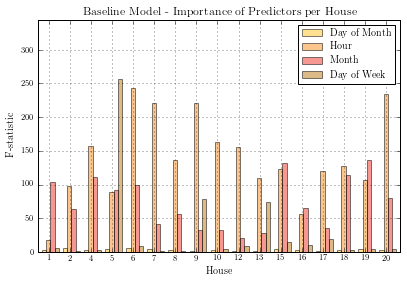

In [20]:
# Setting the positions and width for the bars
pos = list(range(len(data['train_F_DayOfMonth'])))
width = 0.2

# Plotting the bars
fig, ax = plt.subplots(1)

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos,
        #using df['pre_score'] data,
        data['train_F_DayOfMonth'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#FFC222')
        # with label the first value in first_name
        #label=df['first_name'][0]

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos],
        #using df['mid_score'] data,
        data['train_F_Hour'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#F78F1E')
        # with label the second value in first_name
        #label=df['first_name'][1]

# Create a bar with post_score data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos],
        #using df['post_score'] data,
        data['train_F_Month'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#EE3224')
        # with label the third value in first_name
        #label=df['first_name'][2]
        
        
plt.bar([p + width*3 for p in pos],
        #using df['post_score'] data,
        data['train_F_WeekDays'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#B9770E')
        # with label the third value in first_name
        #label=df['first_name'][2]


# Set the y axis label
ax.set_ylabel('F-statistic')

# Set the chart's title
ax.set_title('Baseline Model - Importance of Predictors per House')

# Set the position of the x ticks
ax.set_xticks([p + 1.6 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(data.index)
ax.set_xlabel('House')

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*5)
plt.ylim([0, max(data['train_F_Hour'] + data['train_F_Month'])] )

# Adding the legend and showing the plot
plt.legend(['Day of Month', 'Hour', 'Month', 'Day of Week'], loc='best')
plt.grid()
plt.savefig('figures/baseline_model/anova.eps')
plt.savefig('figures/baseline_model/anova.pdf')
plt.show()

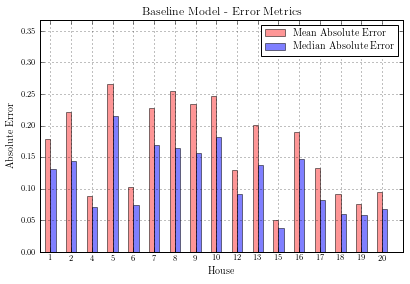

In [18]:
# Setting the positions and width for the bars
pos = list(range(len(data['test_mae'])))
width = 0.25

# Plotting the bars
fig, ax = plt.subplots(1)

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos,
        #using df['pre_score'] data,
        data['test_mae'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#FE2E2E')
        # with label the first value in first_name
        #label=df['first_name'][0]

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos],
        #using df['mid_score'] data,
        data['test_mde'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#0000FF')
        # with label the second value in first_name
        #label=df['first_name'][1]



# Set the y axis label
ax.set_ylabel('Absolute Error')

# Set the chart's title
ax.set_title('Baseline Model - Error Metrics')

# Set the position of the x ticks
ax.set_xticks([p + 1.0 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(data.index)
ax.set_xlabel('House')

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*5)
plt.ylim([0, max(data['test_mae'] + 0.1)] )

# Adding the legend and showing the plot
plt.legend(['Mean Absolute Error', 'Median Absolute Error'], loc='best')
plt.grid()
plt.savefig('figures/baseline_model/mae_mde.eps')
plt.savefig('figures/baseline_model/mae_mde.pdf')
plt.show()

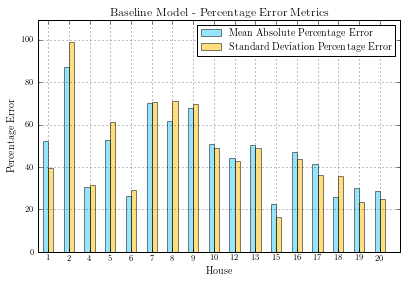

In [21]:
# Setting the positions and width for the bars
pos = list(range(len(data['test_mape'])))
width = 0.25

# Plotting the bars
fig, ax = plt.subplots(1)

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos,
        #using df['pre_score'] data,
        data['test_mape'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#2ECCFA')
        # with label the first value in first_name
        #label=df['first_name'][0]

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos],
        #using df['mid_score'] data,
        data['test_stdape'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#FFBF00')
        # with label the second value in first_name
        #label=df['first_name'][1]



# Set the y axis label
ax.set_ylabel('Percentage Error')

# Set the chart's title
ax.set_title('Baseline Model - Percentage Error Metrics')

# Set the position of the x ticks
ax.set_xticks([p + 1.0 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(data.index)
ax.set_xlabel('House')

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*5)
plt.ylim([0, max(data['test_stdape'] + 10)] )

# Adding the legend and showing the plot
plt.legend(['Mean Absolute Percentage Error', 'Standard Deviation Percentage Error'], loc='best')
plt.grid()
plt.savefig('figures/baseline_model/mape_stdape.eps')
plt.savefig('figures/baseline_model/mape_stdape.pdf')
plt.show()

## Linear Regression with weather variables

In [4]:
# load the results csv
data = pd.read_csv('results_linear_weather.csv',index_col='House')
data = data.drop(['Unnamed: 0'],axis=1)

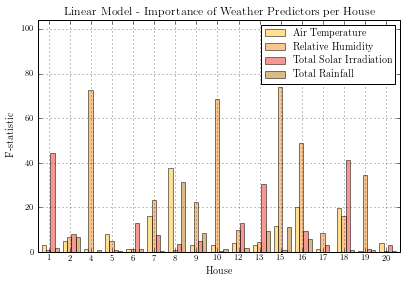

In [8]:
# Setting the positions and width for the bars
pos = list(range(len(data['train_F_AirTemperature'])))
width = 0.2

# Plotting the bars
fig, ax = plt.subplots(1)

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos,
        #using df['pre_score'] data,
        data['train_F_AirTemperature'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#FFC222')
        # with label the first value in first_name
        #label=df['first_name'][0]

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos],
        #using df['mid_score'] data,
        data['train_F_Relative_humitidity'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#F78F1E')
        # with label the second value in first_name
        #label=df['first_name'][1]

# Create a bar with post_score data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos],
        #using df['post_score'] data,
        data['train_F_Total_horizontal_solar_irradiation'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#EE3224')
        # with label the third value in first_name
        #label=df['first_name'][2]
        
        
plt.bar([p + width*3 for p in pos],
        #using df['post_score'] data,
        data['train_F_Total_rainfall'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#B9770E')
        # with label the third value in first_name
        #label=df['first_name'][2]


# Set the y axis label
ax.set_ylabel('F-statistic')

# Set the chart's title
ax.set_title('Linear Model - Importance of Weather Predictors per House')

# Set the position of the x ticks
ax.set_xticks([p + 1.6 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(data.index)
ax.set_xlabel('House')

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*5)
plt.ylim([0, max(data['train_F_Relative_humitidity'] + 30)] )

# Adding the legend and showing the plot
plt.legend(['Air Temperature','Relative Humidity', 'Total Solar Irradiation','Total Rainfall'], loc='best')
plt.grid()
plt.savefig('figures/baseline_model/anova_weather.eps')
plt.savefig('figures/baseline_model/anova_weather.pdf')
plt.show()

## Dynamic Regression Results 

In [3]:
# load the results csv
data = pd.read_csv('results_dynamic_regression.csv',index_col='House')
data = data.drop(['Unnamed: 0'],axis=1)

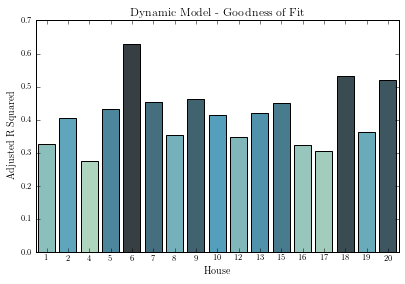

In [6]:
#sns.set(style="whitegrid", color_codes=True)
y=data.train_r_squared_adj.values
x=data.index
pal = sns.color_palette("GnBu_d", len(data))
rank = data.train_r_squared_adj.argsort().argsort()

plt.figure(1)
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank])
plt.ylabel('Adjusted R Squared')
plt.title('Dynamic Model - Goodness of Fit')
plt.savefig('figures/dynamic_model/adj_rsquared.eps')
plt.savefig('figures/dynamic_model/adj_rsquared.pdf')
plt.show()

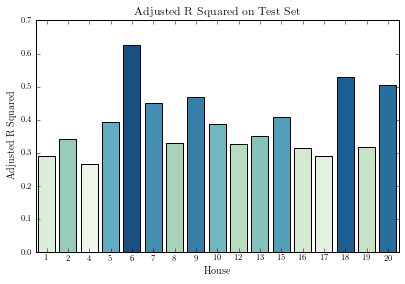

In [5]:
#sns.set(style="whitegrid", color_codes=True)
y=data.test_r_squared_adj.values
x=data.index
pal = sns.color_palette("GnBu_r", len(data))
rank = data.test_r_squared_adj.argsort().argsort()

plt.figure(1)
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank])
plt.ylabel('Adjusted R Squared')
plt.title('Adjusted R Squared on Test Set')
plt.savefig('figures/dynamic_model/adj_rsquared_test.eps')
plt.savefig('figures/dynamic_model/adj_rsquared_test.pdf')
plt.show()

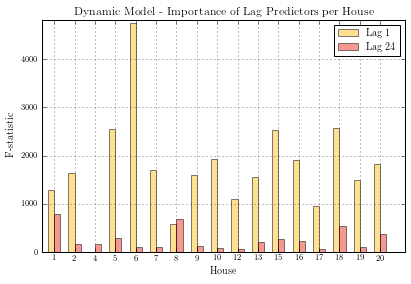

In [14]:
# Setting the positions and width for the bars
pos = list(range(len(data['train_F_DayOfMonth'])))
width = 0.3

# Plotting the bars
fig, ax = plt.subplots(1)

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos,
        #using df['pre_score'] data,
        data['train_F_t1'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#FFC222')
        # with label the first value in first_name
        #label=df['first_name'][0]

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos],
        #using df['mid_score'] data,
        data['train_F_t24'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#EE3224')
        # with label the second value in first_name
        #label=df['first_name'][1]


# Set the y axis label
ax.set_ylabel('F-statistic')

# Set the chart's title
ax.set_title('Dynamic Model - Importance of Lag Predictors per House')

# Set the position of the x ticks
ax.set_xticks([p + 1 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(data.index)
ax.set_xlabel('House')

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*5)
plt.ylim([0, max(data['train_F_Hour'] + data['train_F_t1'])] )

# Adding the legend and showing the plot
plt.legend(['Lag 1','Lag 24'], loc='best')
plt.grid()
plt.savefig('figures/dynamic_model/anova.eps')
plt.savefig('figures/dynamic_model/anova.pdf')
plt.show()

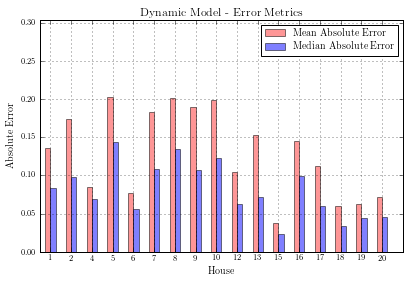

In [15]:
# Setting the positions and width for the bars
pos = list(range(len(data['test_mae'])))
width = 0.25

# Plotting the bars
fig, ax = plt.subplots(1)

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos,
        #using df['pre_score'] data,
        data['test_mae'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#FE2E2E')
        # with label the first value in first_name
        #label=df['first_name'][0]

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos],
        #using df['mid_score'] data,
        data['test_mde'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#0000FF')
        # with label the second value in first_name
        #label=df['first_name'][1]



# Set the y axis label
ax.set_ylabel('Absolute Error')

# Set the chart's title
ax.set_title('Dynamic Model - Error Metrics')

# Set the position of the x ticks
ax.set_xticks([p + 1.0 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(data.index)
ax.set_xlabel('House')

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*5)
plt.ylim([0, max(data['test_mae'] + 0.1)] )

# Adding the legend and showing the plot
plt.legend(['Mean Absolute Error', 'Median Absolute Error'], loc='best')
plt.grid()
plt.savefig('figures/dynamic_model/mae_mde.eps')
plt.savefig('figures/dynamic_model/mae_mde.pdf')
plt.show()

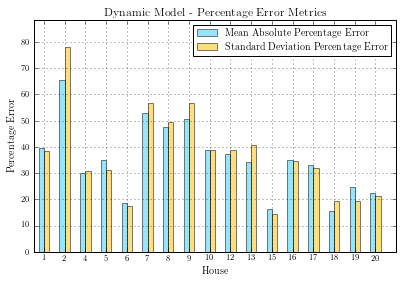

In [16]:
# Setting the positions and width for the bars
pos = list(range(len(data['test_mape'])))
width = 0.25

# Plotting the bars
fig, ax = plt.subplots(1)

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos,
        #using df['pre_score'] data,
        data['test_mape'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#2ECCFA')
        # with label the first value in first_name
        #label=df['first_name'][0]

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos],
        #using df['mid_score'] data,
        data['test_stdape'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#FFBF00')
        # with label the second value in first_name
        #label=df['first_name'][1]



# Set the y axis label
ax.set_ylabel('Percentage Error')

# Set the chart's title
ax.set_title('Dynamic Model - Percentage Error Metrics')

# Set the position of the x ticks
ax.set_xticks([p + 1.0 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(data.index)
ax.set_xlabel('House')

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*5)
plt.ylim([0, max(data['test_stdape'] + 10)] )

# Adding the legend and showing the plot
plt.legend(['Mean Absolute Percentage Error', 'Standard Deviation Percentage Error'], loc='best')
plt.grid()
plt.savefig('figures/dynamic_model/mape_stdape.eps')
plt.savefig('figures/dynamic_model/mape_stdape.pdf')
plt.show()

## Random Forests Regression Results

In [4]:
# load the results csv
data = pd.read_csv('results_forest_regression.csv',index_col='House')
data = data.drop(['Unnamed: 0'],axis=1)

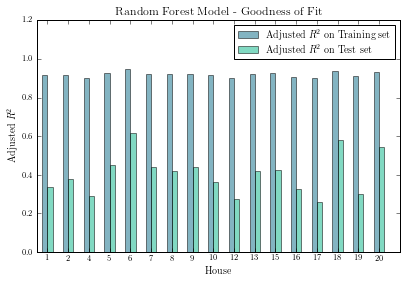

In [11]:
# Setting the positions and width for the bars
pos = list(range(len(data['train_r_squared_adj'])))
width = 0.25

# Plotting the bars
fig, ax = plt.subplots(1)

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos,
        #using df['pre_score'] data,
        data['train_r_squared_adj'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#086A87')
        # with label the first value in first_name
        #label=df['first_name'][0]

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos],
        #using df['mid_score'] data,
        data['test_r_squared_adj'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#04B486')
        # with label the second value in first_name
        #label=df['first_name'][1]



# Set the y axis label
ax.set_ylabel(r'Adjusted $R^2$')

# Set the chart's title
ax.set_title('Dynamic Model - Percentage Error Metrics')

# Set the position of the x ticks
ax.set_xticks([p + 1.0 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(data.index)
ax.set_xlabel('House')

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*5)
plt.ylim([0, 1.2] )

# Adding the legend and showing the plot
plt.legend([r'Adjusted $R^2$ on Training set', r'Adjusted $R^2$ on Test set'], loc='best')

plt.ylabel(r'Adjusted $R^2$')
plt.title('Random Forest Model - Goodness of Fit')
plt.savefig('figures/forest_model/adj_rsquared.eps')
plt.savefig('figures/forest_model/adj_rsquared.pdf')
plt.show()

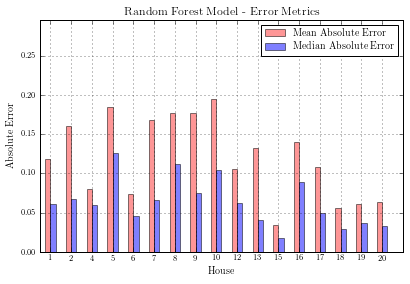

In [12]:
# Setting the positions and width for the bars
pos = list(range(len(data['test_mae'])))
width = 0.25

# Plotting the bars
fig, ax = plt.subplots(1)

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos,
        #using df['pre_score'] data,
        data['test_mae'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#FE2E2E')
        # with label the first value in first_name
        #label=df['first_name'][0]

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos],
        #using df['mid_score'] data,
        data['test_mde'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#0000FF')
        # with label the second value in first_name
        #label=df['first_name'][1]



# Set the y axis label
ax.set_ylabel('Absolute Error')

# Set the chart's title
ax.set_title('Random Forest Model - Error Metrics')

# Set the position of the x ticks
ax.set_xticks([p + 1.0 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(data.index)
ax.set_xlabel('House')

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*5)
plt.ylim([0, max(data['test_mae'] + 0.1)] )

# Adding the legend and showing the plot
plt.legend(['Mean Absolute Error', 'Median Absolute Error'], loc='best')
plt.grid()
plt.savefig('figures/forest_model/mae_mde.eps')
plt.savefig('figures/forest_model/mae_mde.pdf')
plt.show()

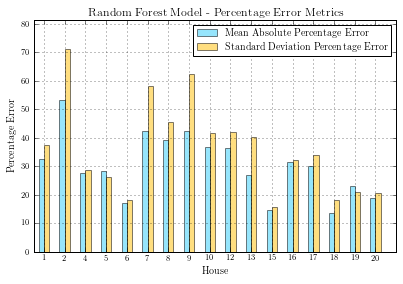

In [13]:
# Setting the positions and width for the bars
pos = list(range(len(data['test_mape'])))
width = 0.25

# Plotting the bars
fig, ax = plt.subplots(1)

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos,
        #using df['pre_score'] data,
        data['test_mape'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#2ECCFA')
        # with label the first value in first_name
        #label=df['first_name'][0]

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos],
        #using df['mid_score'] data,
        data['test_stdape'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#FFBF00')
        # with label the second value in first_name
        #label=df['first_name'][1]



# Set the y axis label
ax.set_ylabel('Percentage Error')

# Set the chart's title
ax.set_title('Random Forest Model - Percentage Error Metrics')

# Set the position of the x ticks
ax.set_xticks([p + 1.0 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(data.index)
ax.set_xlabel('House')

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*5)
plt.ylim([0, max(data['test_stdape'] + 10)] )

# Adding the legend and showing the plot
plt.legend(['Mean Absolute Percentage Error', 'Standard Deviation Percentage Error'], loc='best')
plt.grid()
plt.savefig('figures/forest_model/mape_stdape.eps')
plt.savefig('figures/forest_model/mape_stdape.pdf')
plt.show()

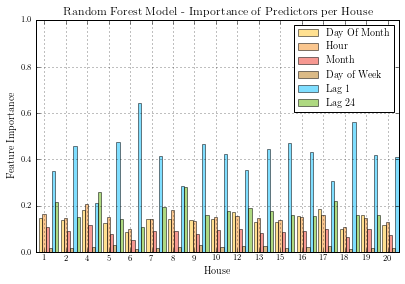

In [17]:
# Setting the positions and width for the bars
pos = list(range(len(data['importance_DayOfMonth'])))
width = 0.15

# Plotting the bars
fig, ax = plt.subplots(1)

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos,
        #using df['pre_score'] data,
        data['importance_DayOfMonth'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#FFC222')
        # with label the first value in first_name
        #label=df['first_name'][0]

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos],
        #using df['mid_score'] data,
        data['importance_Hour'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#F78F1E')
        # with label the second value in first_name
        #label=df['first_name'][1]

# Create a bar with post_score data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos],
        #using df['post_score'] data,
        data['importance_Month'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#EE3224')
        # with label the third value in first_name
        #label=df['first_name'][2]
        
        
plt.bar([p + width*3 for p in pos],
        #using df['post_score'] data,
        data['importance_WeekDays'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#B9770E')
        # with label the third value in first_name
        #label=df['first_name'][2]
        
        
plt.bar([p + width*4 for p in pos],
        #using df['post_score'] data,
        data['importance_t1'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#00BFFF')

plt.bar([p + width*5 for p in pos],
        #using df['post_score'] data,
        data['importance_t24'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#5FB404')



# Set the y axis label
ax.set_ylabel('Feature Importance')

# Set the chart's title
ax.set_title('Random Forest Model - Importance of Predictors per House')

# Set the position of the x ticks
ax.set_xticks([p + 1.6 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(data.index)
ax.set_xlabel('House')

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*5)
plt.ylim([0, 1] )

# Adding the legend and showing the plot
plt.legend(['Day Of Month','Hour', 'Month', 'Day of Week', 'Lag 1', 'Lag 24'], loc='best')
plt.grid()
plt.savefig('figures/forest_model/anova.eps')
plt.savefig('figures/forest_model/anova.pdf')
plt.show()

# XgBoost results

In [3]:
# load the results csv
data = pd.read_csv('results_xgboost_regression.csv',index_col='House')
data = data.drop(['Unnamed: 0'],axis=1)

In [4]:
data.describe()

,importance_DayOfMonth,importance_Hour,importance_Month,importance_WeekDays,importance_air_temperature,importance_humidity,importance_irradiation,importance_rainfall,importance_t1,importance_t24,...,test_r_squared,test_r_squared_adj,test_stdape,train_mae,train_mape,train_mde,train_mse,train_r_squared,train_r_squared_adj,train_stdape
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,695.588235,1515.411765,451.235294,368.764706,1132.941176,814.882353,1009.647059,137.352941,1562.117647,1178.000000,...,0.453006,0.431935,34.412841,0.103256,27.134902,0.061143,0.029828,0.604109,0.599156,29.272979
std,243.507202,371.993793,169.232285,121.673502,327.103476,280.138556,224.261271,69.997269,395.093167,284.608064,...,0.098873,0.102635,15.871454,0.045212,9.743833,0.027939,0.021743,0.072087,0.072965,12.778051
min,314.000000,849.000000,186.000000,207.000000,746.000000,414.000000,751.000000,31.000000,1092.000000,702.000000,...,0.297597,0.271493,13.770930,0.029371,12.459685,0.016998,0.002055,0.500907,0.494199,11.929515
25%,536.000000,1240.000000,331.000000,295.000000,911.000000,637.000000,821.000000,94.000000,1246.000000,989.000000,...,0.398298,0.376387,20.773136,0.064233,20.507424,0.043221,0.007879,0.542962,0.537374,17.541865
50%,612.000000,1484.000000,439.000000,355.000000,1030.000000,786.000000,987.000000,124.000000,1421.000000,1063.000000,...,0.451986,0.431421,33.862009,0.107020,27.043943,0.058112,0.028112,0.614601,0.609853,27.351185
75%,855.000000,1735.000000,554.000000,447.000000,1308.000000,832.000000,1100.000000,155.000000,1812.000000,1374.000000,...,0.502909,0.484066,39.810147,0.143029,33.388687,0.073841,0.047752,0.655609,0.651428,33.960186
max,1277.000000,2225.000000,840.000000,662.000000,2029.000000,1612.000000,1611.000000,309.000000,2489.000000,1864.000000,...,0.663962,0.650832,69.660151,0.173045,46.690851,0.109628,0.068066,0.721636,0.718101,58.329075


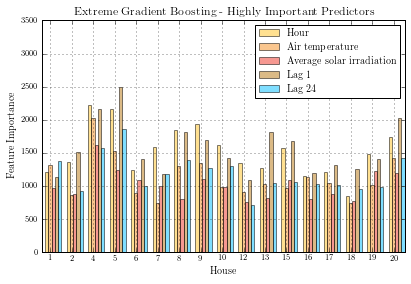

In [5]:
# Setting the positions and width for the bars
pos = list(range(len(data['importance_DayOfMonth'])))
width = 0.15

# Plotting the bars
fig, ax = plt.subplots(1)

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos,
        #using df['pre_score'] data,
        data['importance_Hour'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#FFC222')
        # with label the first value in first_name
        #label=df['first_name'][0]

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos],
        #using df['mid_score'] data,
        data['importance_air_temperature'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#F78F1E')
        # with label the second value in first_name
        #label=df['first_name'][1]

# Create a bar with post_score data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos],
        #using df['post_score'] data,
        data['importance_irradiation'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#EE3224')
        # with label the third value in first_name
        #label=df['first_name'][2]
        
        
plt.bar([p + width*3 for p in pos],
        #using df['post_score'] data,
        data['importance_t1'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#B9770E')
        # with label the third value in first_name
        #label=df['first_name'][2]
        
        
plt.bar([p + width*4 for p in pos],
        #using df['post_score'] data,
        data['importance_t24'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#00BFFF')



# Set the y axis label
ax.set_ylabel('Feature Importance')

# Set the chart's title
ax.set_title('Extreme Gradient Boosting - Highly Important Predictors')

# Set the position of the x ticks
ax.set_xticks([p + 1.6 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(data.index)
ax.set_xlabel('House')

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*5)
plt.ylim([0, 3500] )

# Adding the legend and showing the plot
plt.legend(['Hour','Air temperature', 'Average solar irradiation', 'Lag 1', 'Lag 24'], loc='best')
plt.grid()
plt.savefig('figures/xgboost/high_importance.eps')
plt.savefig('figures/xgboost/high_importance.pdf')
plt.show()

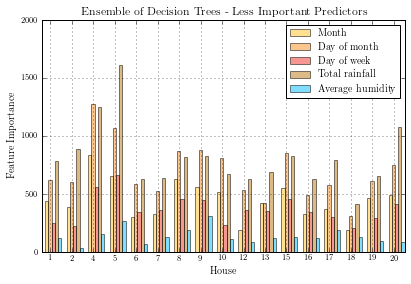

In [14]:
# Setting the positions and width for the bars
pos = list(range(len(data['importance_DayOfMonth'])))
width = 0.15

# Plotting the bars
fig, ax = plt.subplots(1)

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos,
        #using df['pre_score'] data,
        data['importance_Month'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#FFC222')
        # with label the first value in first_name
        #label=df['first_name'][0]

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos],
        #using df['mid_score'] data,
        data['importance_DayOfMonth'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#F78F1E')
        # with label the second value in first_name
        #label=df['first_name'][1]

# Create a bar with post_score data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos],
        #using df['post_score'] data,
        data['importance_WeekDays'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#EE3224')
        # with label the third value in first_name
        #label=df['first_name'][2]
        
        
plt.bar([p + width*3 for p in pos],
        #using df['post_score'] data,
        data['importance_humidity'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#B9770E')
        # with label the third value in first_name
        #label=df['first_name'][2]
        
        
plt.bar([p + width*4 for p in pos],
        #using df['post_score'] data,
        data['importance_rainfall'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#00BFFF')



# Set the y axis label
ax.set_ylabel('Feature Importance')

# Set the chart's title
ax.set_title('Ensemble of Decision Trees - Less Important Predictors')

# Set the position of the x ticks
ax.set_xticks([p + 1.6 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(data.index)
ax.set_xlabel('House')

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*5)
plt.ylim([0, 2000] )

# Adding the legend and showing the plot
plt.legend(['Month','Day of month', 'Day of week', 'Total rainfall', 'Average humidity'], loc='best')
plt.grid()
plt.savefig('figures/xgboost/low_importance.eps')
plt.savefig('figures/xgboost/low_importance.pdf')
plt.show()